# Breast Cancer Project

# Importing Libraries

In [1]:
# for database
import sqlite3
import pandas as pd # for dataframe
import numpy as np # analysis
# plotting 
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn import manifold 
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import seaborn as sns

from scipy import stats # significance levels, normality
import itertools # for combinations
import statsmodels.api as sm # anova
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore') # hide matplotlib warnings


# Connecting to the Data

In [2]:
df= pd.read_csv('Breast_Cancer_data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Cleaning the Data 

In [4]:
# Screen for missing values:

df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
# Screening for categorical Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
# Standardizing the data
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [8]:
df.shape

(569, 32)

In [9]:
# Checking for Duplicates
df.duplicated().sum()

0

# Check for extraneous values

In [10]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 883263     0.001757
906564     0.001757
89122      0.001757
9013579    0.001757
868682     0.001757
Name: id, dtype: float64 


diagnosis 
 B    0.627417
M    0.372583
Name: diagnosis, dtype: float64 


radius_mean 
 12.34    0.007030
12.77    0.005272
15.46    0.005272
12.89    0.005272
13.05    0.005272
Name: radius_mean, dtype: float64 


texture_mean 
 14.93    0.005272
15.70    0.005272
18.90    0.005272
16.84    0.005272
17.46    0.005272
Name: texture_mean, dtype: float64 


perimeter_mean 
 82.61     0.005272
134.70    0.005272
87.76     0.005272
130.00    0.003515
58.79     0.003515
Name: perimeter_mean, dtype: float64 


area_mean 
 512.2     0.005272
1214.0    0.003515
399.8     0.003515
758.6     0.003515
1075.0    0.003515
Name: area_mean, dtype: float64 


smoothness_mean 
 0.1007    0.008787
0.1075    0.007030
0.1054    0.007030
0.1150    0.007030
0.1089    0.005272
Name: smoothness_mean, dtype: float64 


compactness_mean 
 0.12060    0.005272
0.11470    0.005272
0

# Histograms to check the normalization of the Data

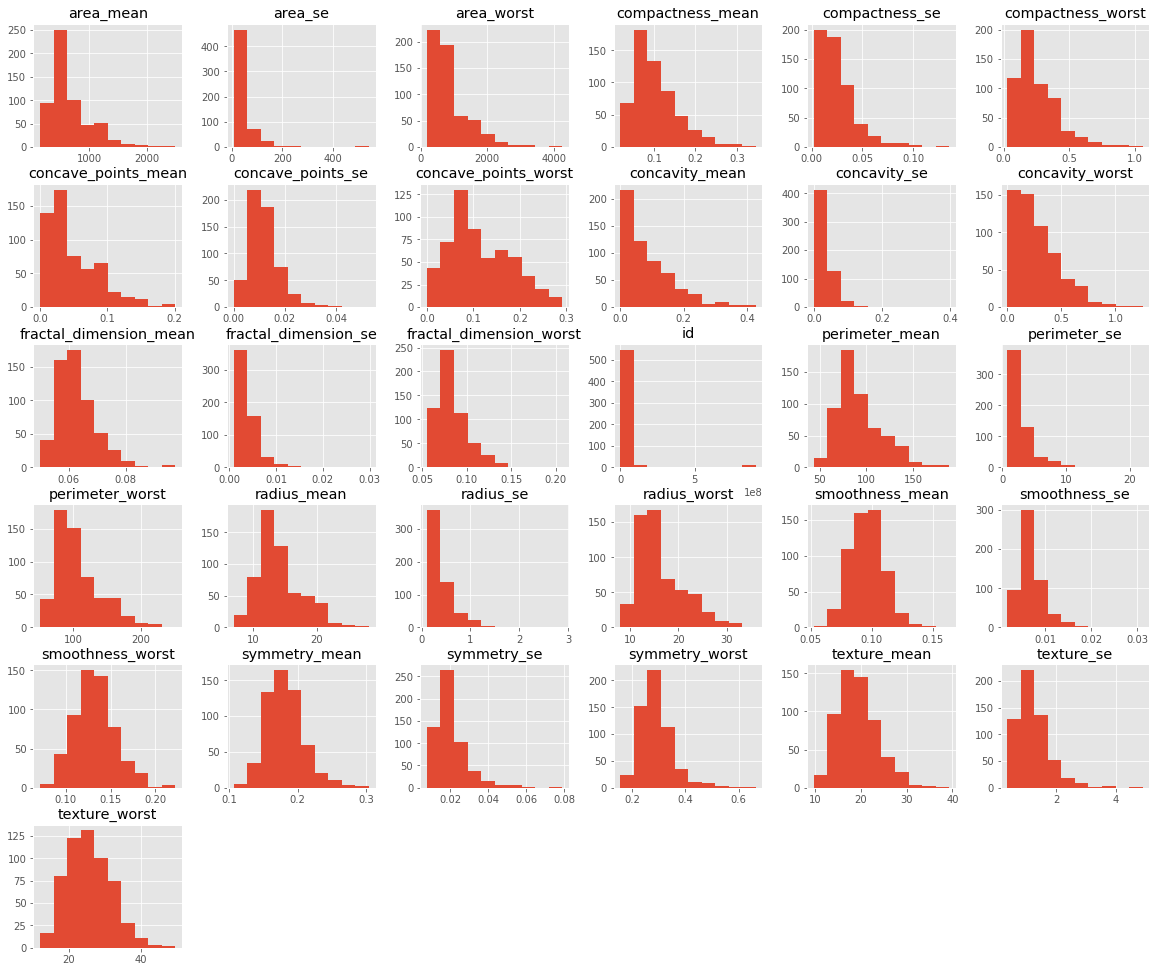

In [11]:
hist= df.hist(figsize = (20,17))

# Transformation for Standarzation of the Data

In [12]:
df1 = pd.DataFrame()
non_normal = ['area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst','symmetry_worst']
for feat in non_normal:
    df1[feat] = df[feat].map(lambda x: np.cbrt(x))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF19D047C8>,
      dtype=object)

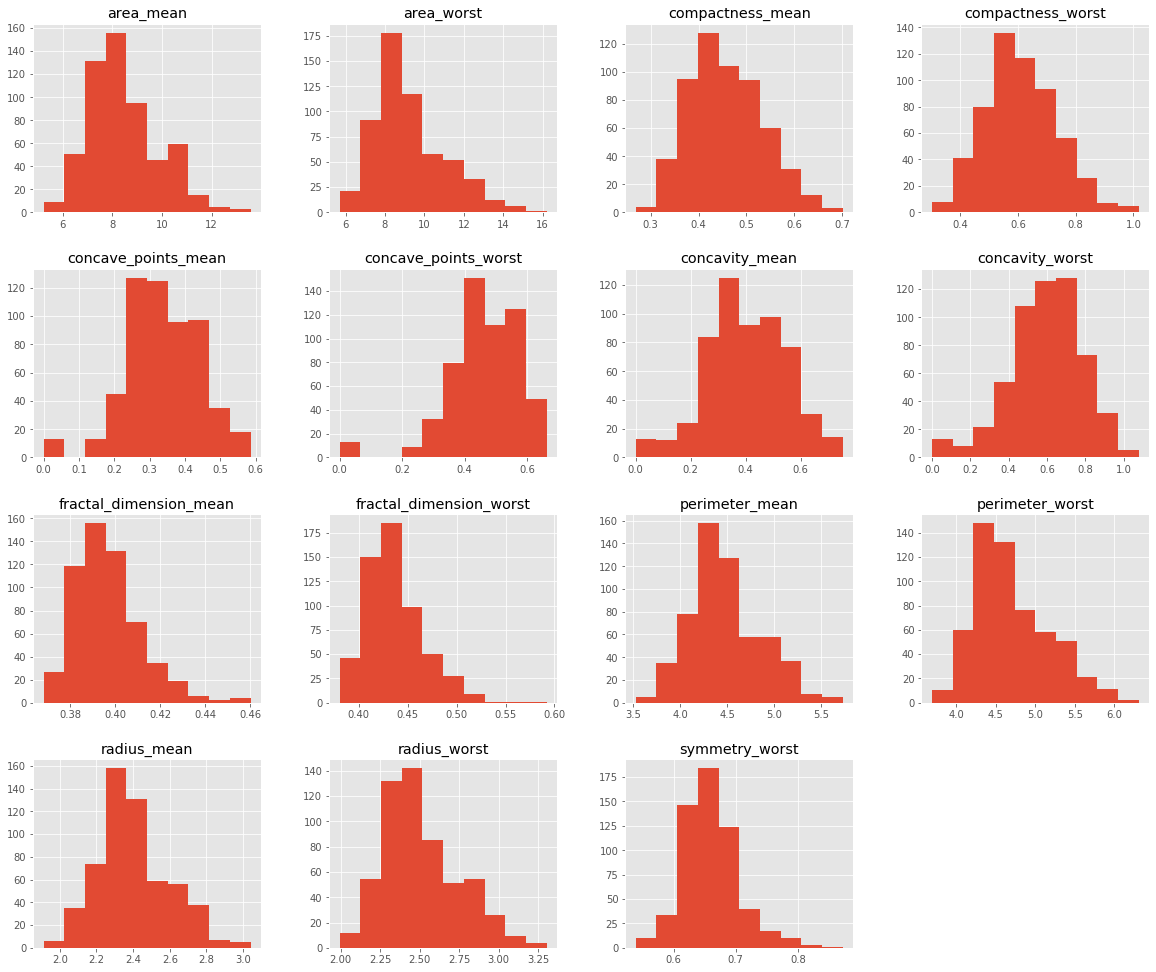

In [13]:
#creating a normalized histogram
normalised_hist = df1.hist(figsize=(20,17))
normalised_hist

In [14]:
df2 = df.join(df1, rsuffix='CBRT_')

In [15]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,concave_points_worstCBRT_,concavity_meanCBRT_,concavity_worstCBRT_,fractal_dimension_meanCBRT_,fractal_dimension_worstCBRT_,perimeter_meanCBRT_,perimeter_worstCBRT_,radius_meanCBRT_,radius_worstCBRT_,symmetry_worstCBRT_
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.642639,0.669507,0.892907,0.428558,0.491731,4.970493,5.693910,2.620256,2.938758,0.772000
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.570827,0.442935,0.622824,0.384106,0.446508,5.103189,5.415229,2.739963,2.923628,0.650296
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.624025,0.582258,0.766536,0.391465,0.444087,5.065797,5.342649,2.700320,2.867168,0.712234
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.636198,0.622653,0.882330,0.460164,0.557205,4.264976,4.624039,2.251932,2.461270,0.872327
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.545696,0.582848,0.736806,0.388925,0.425027,5.131194,5.339143,2.727474,2.824780,0.618324


# Scanning for Outliers

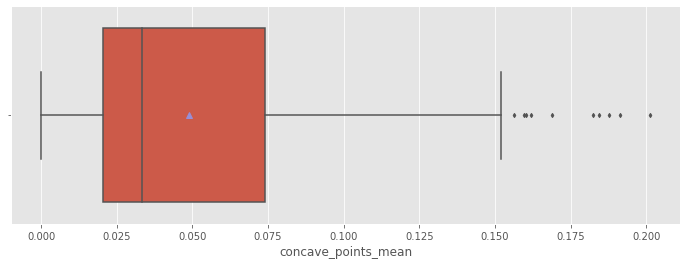

In [16]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'concave_points_mean', data = df2, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

In [17]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                              7.943911e+06
radius_mean                     4.080000e+00
texture_mean                    5.630000e+00
perimeter_mean                  2.893000e+01
area_mean                       3.624000e+02
smoothness_mean                 1.893000e-02
compactness_mean                6.548000e-02
concavity_mean                  1.011400e-01
concave_points_mean             5.369000e-02
symmetry_mean                   3.380000e-02
fractal_dimension_mean          8.420000e-03
radius_se                       2.465000e-01
texture_se                      6.401000e-01
perimeter_se                    1.751000e+00
area_se                         2.734000e+01
smoothness_se                   2.977000e-03
compactness_se                  1.937000e-02
concavity_se                    2.696000e-02
concave_points_se               7.072000e-03
symmetry_se                     8.320000e-03
fractal_dimension_se            2.310000e-03
radius_worst                    5.780000e+00
texture_wo

In [18]:
IQR*1.5

id                              1.191587e+07
radius_mean                     6.120000e+00
texture_mean                    8.445000e+00
perimeter_mean                  4.339500e+01
area_mean                       5.436000e+02
smoothness_mean                 2.839500e-02
compactness_mean                9.822000e-02
concavity_mean                  1.517100e-01
concave_points_mean             8.053500e-02
symmetry_mean                   5.070000e-02
fractal_dimension_mean          1.263000e-02
radius_se                       3.697500e-01
texture_se                      9.601500e-01
perimeter_se                    2.626500e+00
area_se                         4.101000e+01
smoothness_se                   4.465500e-03
compactness_se                  2.905500e-02
concavity_se                    4.044000e-02
concave_points_se               1.060800e-02
symmetry_se                     1.248000e-02
fractal_dimension_se            3.465000e-03
radius_worst                    8.670000e+00
texture_wo

In [19]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
cons=IQR*1.5
print(cons)

id                              1.191587e+07
radius_mean                     6.120000e+00
texture_mean                    8.445000e+00
perimeter_mean                  4.339500e+01
area_mean                       5.436000e+02
smoothness_mean                 2.839500e-02
compactness_mean                9.822000e-02
concavity_mean                  1.517100e-01
concave_points_mean             8.053500e-02
symmetry_mean                   5.070000e-02
fractal_dimension_mean          1.263000e-02
radius_se                       3.697500e-01
texture_se                      9.601500e-01
perimeter_se                    2.626500e+00
area_se                         4.101000e+01
smoothness_se                   4.465500e-03
compactness_se                  2.905500e-02
concavity_se                    4.044000e-02
concave_points_se               1.060800e-02
symmetry_se                     1.248000e-02
fractal_dimension_se            3.465000e-03
radius_worst                    8.670000e+00
texture_wo

In [20]:
# These values are a mathematical calculation of the outliers in the data, and will then be dropped from the data set. 
upper_outlier = Q3+cons
lower_outlier = Q1-cons
print(upper_outlier)
print('_______________')
print(lower_outlier)

id                              2.072900e+07
radius_mean                     2.190000e+01
texture_mean                    3.024500e+01
perimeter_mean                  1.474950e+02
area_mean                       1.326300e+03
smoothness_mean                 1.336950e-01
compactness_mean                2.286200e-01
concavity_mean                  2.824100e-01
concave_points_mean             1.545350e-01
symmetry_mean                   2.464000e-01
fractal_dimension_mean          7.875000e-02
radius_se                       8.486500e-01
texture_se                      2.434150e+00
perimeter_se                    5.983500e+00
area_se                         8.620000e+01
smoothness_se                   1.261150e-02
compactness_se                  6.150500e-02
concavity_se                    8.249000e-02
concave_points_se               2.531800e-02
symmetry_se                     3.596000e-02
fractal_dimension_se            8.023000e-03
radius_worst                    2.746000e+01
texture_wo

In [21]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
# df3.hist(figsize=(20,17))

In [23]:
# df3.head()

In [24]:
# df3.info()

In [25]:
clean_df = df2.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se'], axis = 1)

In [26]:
clean_df2 = clean_df.drop(['area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst', 'symmetry_worst'], axis = 1)

In [31]:
clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
id                              569 non-null int64
diagnosis                       569 non-null object
texture_mean                    569 non-null float64
smoothness_mean                 569 non-null float64
symmetry_mean                   569 non-null float64
texture_worst                   569 non-null float64
smoothness_worst                569 non-null float64
area_meanCBRT_                  569 non-null float64
area_worstCBRT_                 569 non-null float64
compactness_meanCBRT_           569 non-null float64
compactness_worstCBRT_          569 non-null float64
concave_points_meanCBRT_        569 non-null float64
concave_points_worstCBRT_       569 non-null float64
concavity_meanCBRT_             569 non-null float64
concavity_worstCBRT_            569 non-null float64
fractal_dimension_meanCBRT_     569 non-null float64
fractal_dimension_worstCBRT_    569 non-null float

# Correlations 

Correlations are being conducted in order to explore strong associations among the variables. 

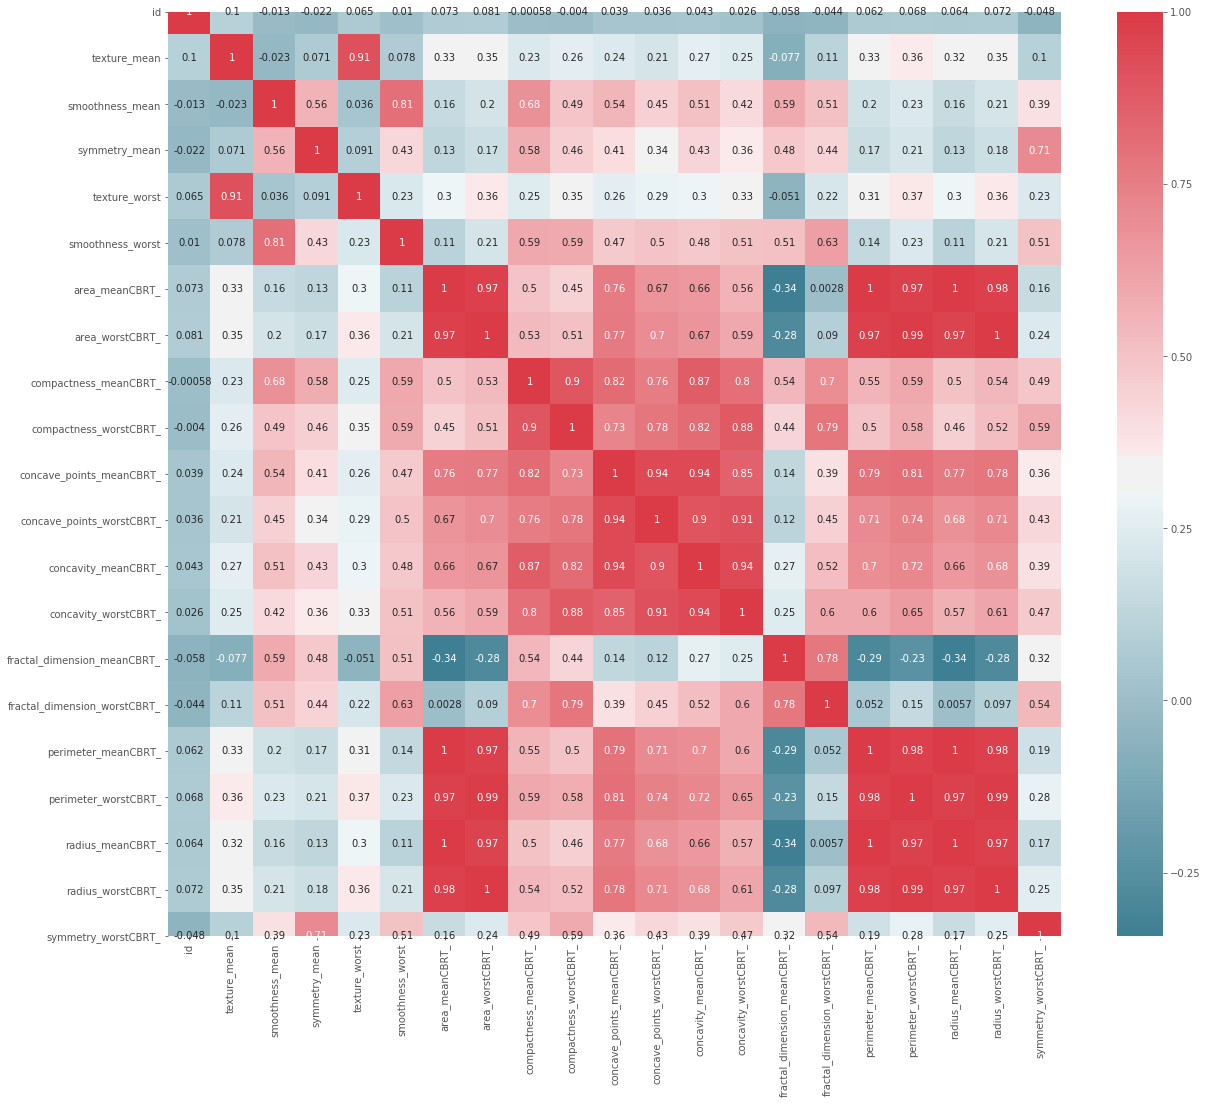

In [34]:
def correlation_heatmap(clean_df2):
    _,ax=plt.subplots(figsize=(20,17))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(clean_df2.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(clean_df2)

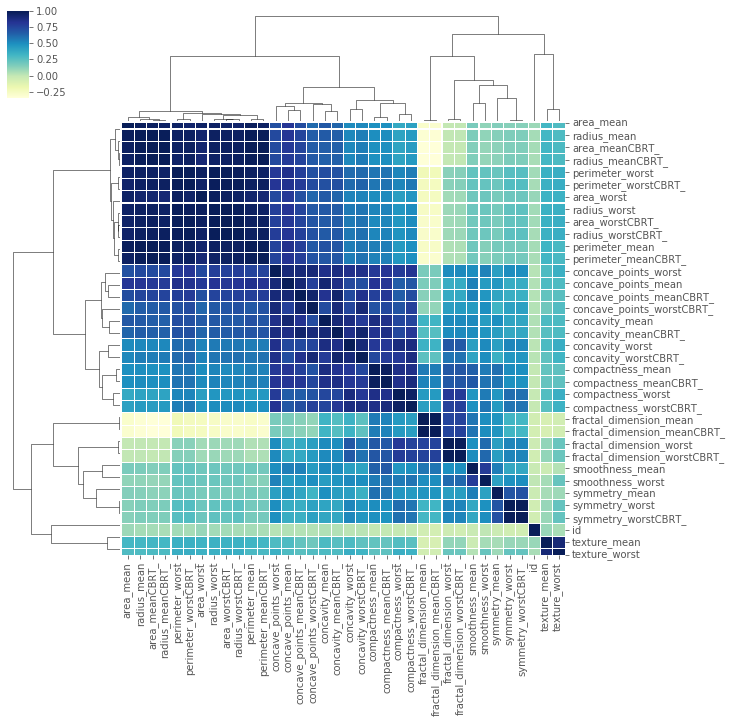

In [29]:
corrmat = clean_df.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg 

In [30]:
print(df4.corr())

NameError: name 'df4' is not defined

# Dropping strongly correlated variables in order to avoid confounding effects. 

In [ ]:
# Correlation matrix
corr_matrix = df4.corr().abs()

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [ ]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [ ]:
to_drop

In [ ]:
# Drop features
df5 = df4.drop(['texture_worst', 'area_worstCBRT_', 'concave_points_worstCBRT_', 'concavity_meanCBRT_', 'concavity_worstCBRT_', 'perimeter_meanCBRT_', 'perimeter_worstCBRT_', 'radius_meanCBRT_',
 'radius_worstCBRT_'], axis = 1)

In [ ]:
df5.info()

# Exploring the Data

In [ ]:
# Summary statistics for diagnosis 
df5['diagnosis'].describe()

In [ ]:
#Plot distribution of diagnosis 
plt.figure(figsize=(8,5))
plt.hist(df5['diagnosis'], bins=20)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
df5.describe()

In [ ]:
for i in df5('diagnosis', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'smoothness_worst', 'area_meanCBRT_', 'compactness_meanCBRT_', 'compactness_worstCBRT_', 'concave_points_meanCBRT_', 'fractal_dimension_meanCBRT_', 'fractal_dimension_worstCBRT_', 'symmetry_worstCBRT_'): 
    plt.figure()
    df5[i][df5['diagnosis'] == 'M'].plot.hist(alpha = 0.5, color='red', title = i)
    df5[i][df5['diagnosis'] == 'B'].plot.hist(alpha = 0.5, color='blue', title = i)
    plt.show()
    

In [ ]:
# df6 = pd.DataFrame(['diagnosis', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'smoothness_worst'])

In [ ]:
# sns.set(style='ticks')
# sns.pairplot(df6,palette = ('r', 'g'), hue= 'diagnosis')
# plt.show()

In [ ]:
#sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df, palette = ('b', 'r'), hue="diagnosis", height=2.5)
# plt.show()

In [ ]:
# # import warnings
# #warnings.filterwarnings('ignore')
# #fig = plt.figure(figsize = (20,17))
# ax = fig.gca()
# df.hist(ax = ax);

After careful observation of the aboved plotted data, it is possible to argue that the following variables normally distributed: texture_worst; smothness_worst; texture_mean; smoothness_mean; and symetry_mean. However, these variables present an indication of outliearsscores, therefore futher investigation should be conducted.